# Render dataset examples

This notebook uses the standardized `Structure` format and `render_schem` to preview examples from `data/raw` in 3D.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from blockgen.utils.data_loader import load_schematic
from blockgen.utils.data import Structure
from blockgen.renderer.render import render_schem

In [2]:
repo_root = Path.cwd()
if not (repo_root / 'data' / 'raw').exists():
    repo_root = repo_root.parent

raw_dir = repo_root / 'data' / 'raw'
sample_paths = sorted(raw_dir.glob('*.schematic'))[:3]
sample_paths

[PosixPath('/home/griffing52/programming/gen/BlockGen/data/raw/1.schematic'),
 PosixPath('/home/griffing52/programming/gen/BlockGen/data/raw/10.schematic'),
 PosixPath('/home/griffing52/programming/gen/BlockGen/data/raw/100.schematic')]

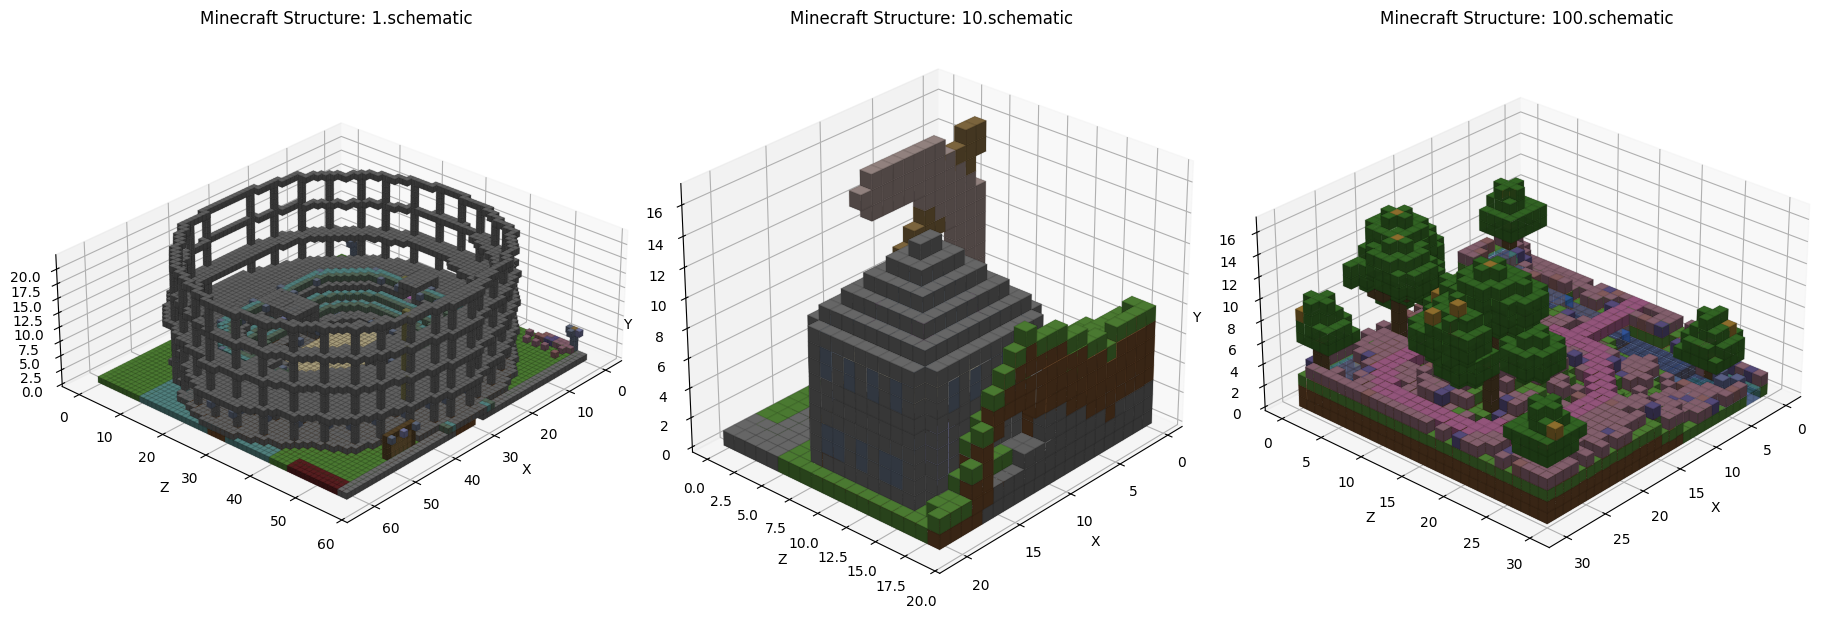

In [3]:
fig = plt.figure(figsize=(18, 6))
for i, path in enumerate(sample_paths, start=1):
    schem = load_schematic(str(path))
    structure = Structure.from_schematic(schem, source_path=str(path))
    ax = fig.add_subplot(1, len(sample_paths), i, projection='3d')
    render_schem(structure, ax=ax, show=False, max_dim=72)

plt.tight_layout()
plt.show()

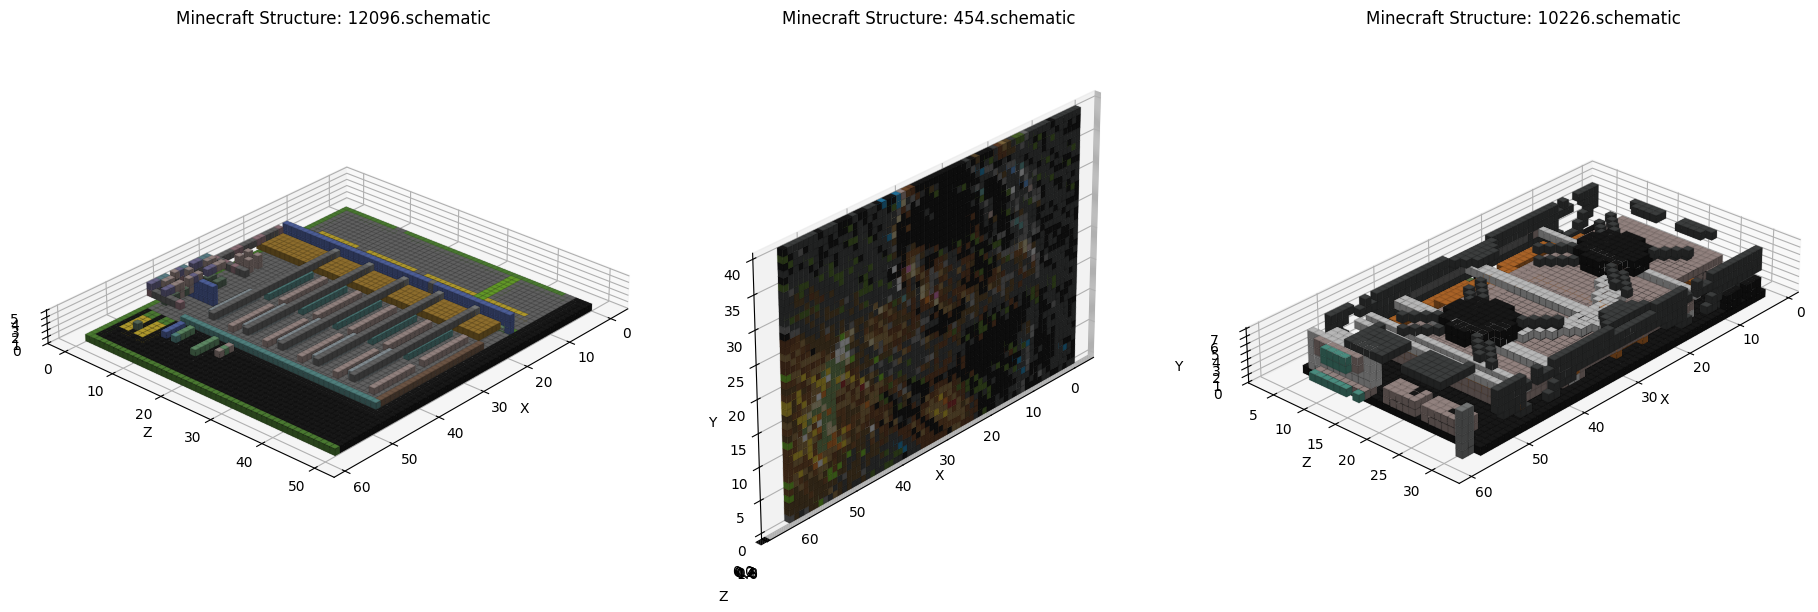

In [ ]:
random_paths = np.random.choice(list(raw_dir.glob('*.schematic')), size=3, replace=False)

fig = plt.figure(figsize=(18, 6))
for i, path in enumerate(random_paths, start=1):
    schem = load_schematic(str(path))
    structure = Structure.from_schematic(schem, source_path=str(path))
    ax = fig.add_subplot(1, len(random_paths), i, projection='3d')
    render_schem(structure, ax=ax, show=False, max_dim=72)

plt.tight_layout()
plt.show()

KeyError: 'Blocks'

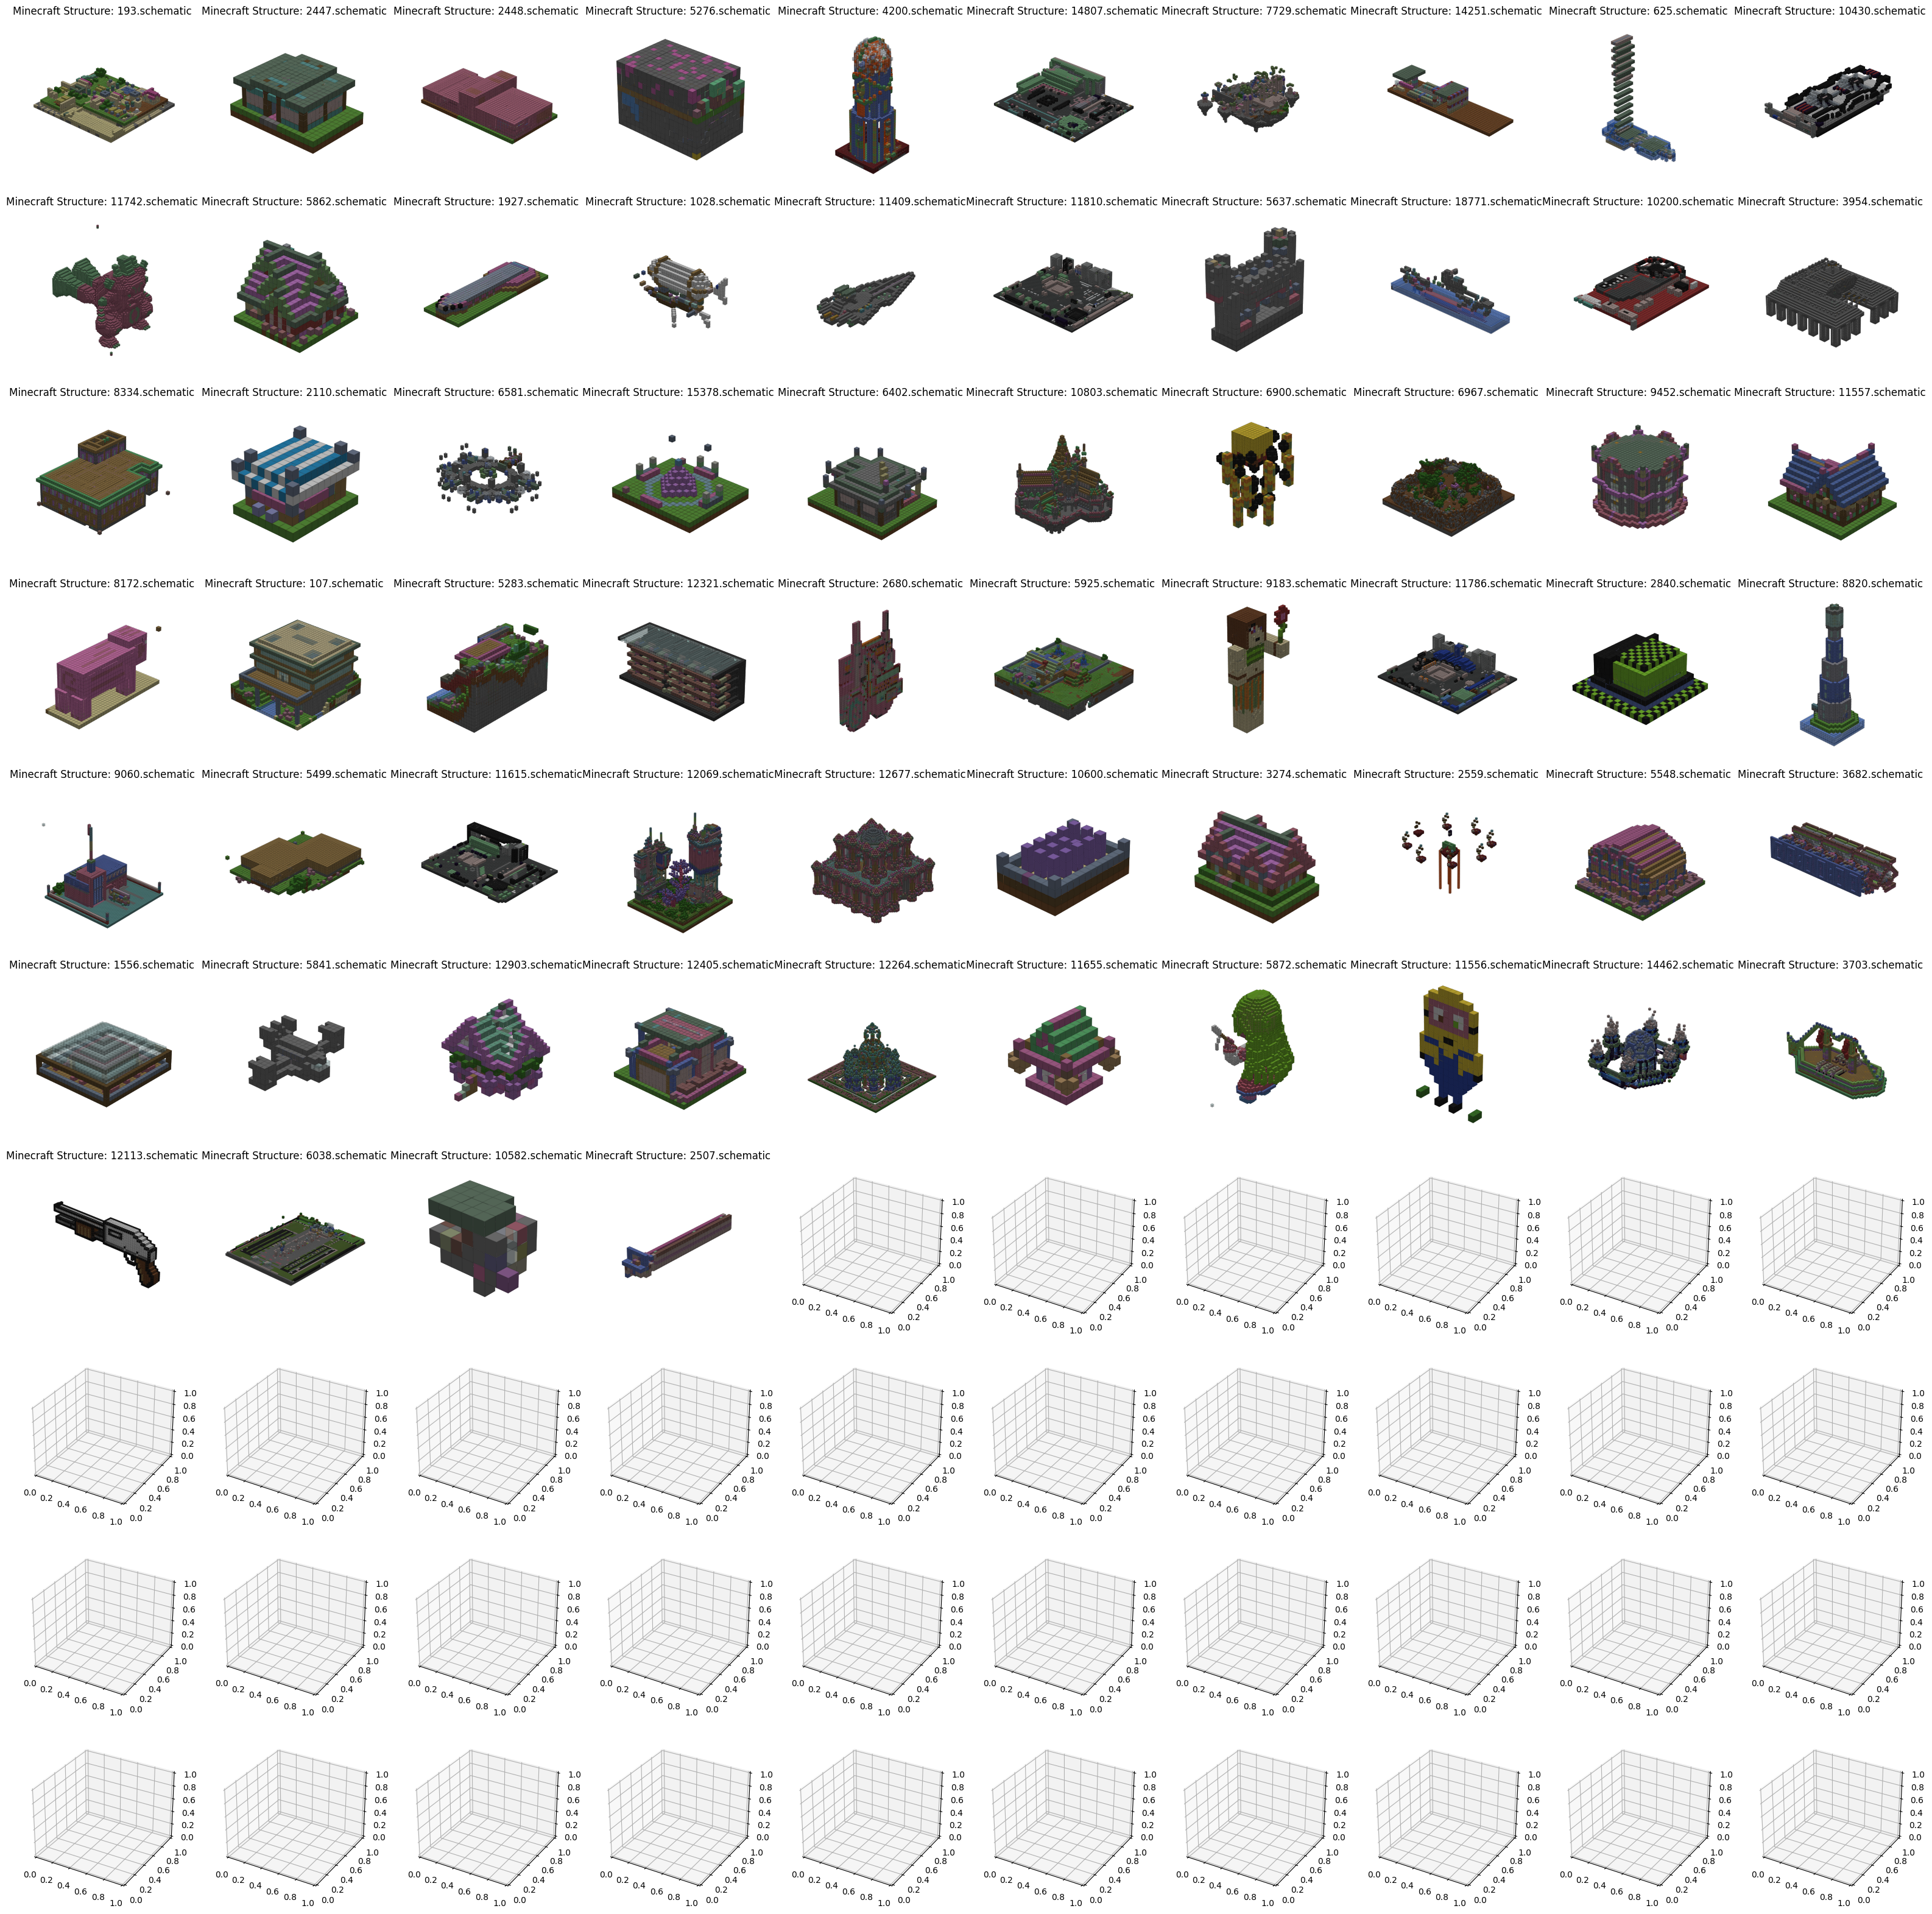

In [7]:
n_rows = 10
n_cols = 10
n_plots = n_rows * n_cols

# Select 400 schematics
random_paths = np.random.choice(
    list(raw_dir.glob('*.schematic')),
    size=n_plots,
    replace=False
)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(40, 40),
    subplot_kw={'projection': '3d'}
)

axes = axes.flatten()

for ax, path in zip(axes, random_paths):
    schem = load_schematic(str(path))
    structure = Structure.from_schematic(schem, source_path=str(path))
    render_schem(structure, ax=ax, show=False, max_dim=72)
    ax.set_axis_off()

plt.tight_layout()
plt.show()